In [41]:
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [42]:
file_paths = glob.glob('drive/MyDrive/segmentation/case2/')

In [43]:
df = pd.read_csv('drive/MyDrive/segmentation/train.csv')
df = df[df['segmentation'].notnull()]

df['case'] = df.apply(lambda x: x['id'].split('_')[0][4:], axis=1)
df['day'] = df.apply(lambda x: x['id'].split('_')[1][3:], axis=1)
df['slice'] = df.apply(lambda x: x['id'].split('_')[3], axis=1)

df = df.drop('id', axis=1)


root_path = 'drive/MyDrive/segmentation/'

df['path'] = df.apply(lambda x: root_path + 'case' + x['case'] +
                      '/case' + x['case'] + '_day' + x['day'] +
                      '/scans/' + 'slice_' + x['slice'] + '*.png', axis=1)
#df['path'] = df.apply(lambda x: root_path + 'case' + x['case'] + '/' +
                     # 'case' + x['case'] + '_day' + x['day'] + '/' +
                    #  'scans/' + 'slice_' + x[slice] + '*.png', axis=1)
print(df.iloc[0, -1])
print(df)

drive/MyDrive/segmentation/case123/case123_day20/scans/slice_0065*.png
              class                                       segmentation case  \
194         stomach  28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...  123   
197         stomach  27561 8 27825 11 28090 13 28355 14 28620 15 28...  123   
200         stomach  15323 4 15587 8 15852 10 16117 11 16383 12 166...  123   
203         stomach  14792 5 15056 9 15321 11 15587 11 15852 13 161...  123   
206         stomach  14526 6 14789 12 15054 14 15319 16 15584 17 15...  123   
...             ...                                                ...  ...   
115459  small_bowel  22540 1 22804 5 23069 7 23334 10 23600 11 2386...   30   
115461  large_bowel  18746 7 19009 23 19038 7 19273 44 19537 49 198...   30   
115462  small_bowel  23079 1 23343 6 23608 9 23874 11 24139 13 2440...   30   
115464  large_bowel  18746 2 19010 8 19040 3 19274 25 19302 12 1953...   30   
115465  small_bowel  21457 6 21722 10 21987 15 22252 18 2251

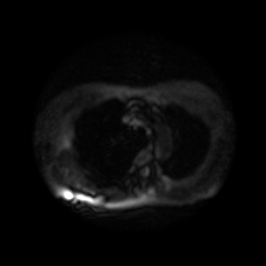

In [44]:
file_name = 'drive/MyDrive/segmentation/case2/case2_day1/scans/slice_0001*.png'

image = Image.open(glob.glob(file_name)[0])
image.show()

In [45]:
classes = df['class'].unique()
dictionary = {c: i for i, c in enumerate(classes)}

df['class'] = df['class'].map(dictionary)

df = df.drop('case', axis=1)
df = df.drop('day', axis=1)
df = df.drop('slice', axis=1)

In [46]:
print(df)

        class                                       segmentation  \
194         0  28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...   
197         0  27561 8 27825 11 28090 13 28355 14 28620 15 28...   
200         0  15323 4 15587 8 15852 10 16117 11 16383 12 166...   
203         0  14792 5 15056 9 15321 11 15587 11 15852 13 161...   
206         0  14526 6 14789 12 15054 14 15319 16 15584 17 15...   
...       ...                                                ...   
115459      2  22540 1 22804 5 23069 7 23334 10 23600 11 2386...   
115461      1  18746 7 19009 23 19038 7 19273 44 19537 49 198...   
115462      2  23079 1 23343 6 23608 9 23874 11 24139 13 2440...   
115464      1  18746 2 19010 8 19040 3 19274 25 19302 12 1953...   
115465      2  21457 6 21722 10 21987 15 22252 18 22517 21 22...   

                                                     path  
194     drive/MyDrive/segmentation/case123/case123_day...  
197     drive/MyDrive/segmentation/case123/case123_day...  
200

In [47]:
X = []
X.append(df['path'].values)
X = np.array(X).squeeze()
print(X.shape)
X = np.unique(X)
print(X.shape)
print(X[10])

index = np.where(X == df.iloc[2, 2])[0]
print(index)
print(df.iloc[2, 2])
print(X[index])


(33913,)
(16590,)
drive/MyDrive/segmentation/case101/case101_day20/scans/slice_0076*.png
[3205]
drive/MyDrive/segmentation/case123/case123_day20/scans/slice_0067*.png
['drive/MyDrive/segmentation/case123/case123_day20/scans/slice_0067*.png']


In [48]:
def decoder(seg):
    s = np.asarray(seg.split(), dtype=int)
    starts = s[0::2] - 1
    length = s[1::2]
    ends = starts + length

    img = np.zeros(266*266, dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1

    img = img.reshape(266, 266)

    return img



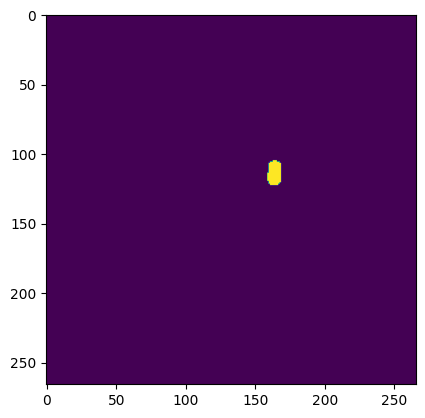

(266, 266)


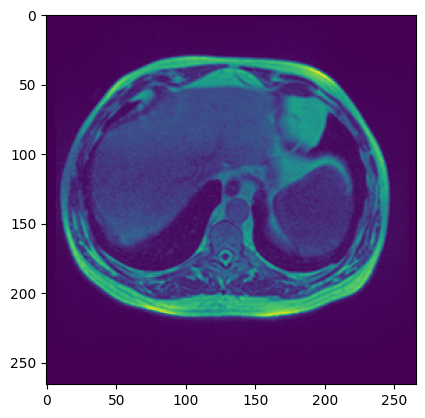

(266, 266)
(266, 266)


In [93]:
seg = df.loc[194, 'segmentation']

seg_img = decoder(seg)

seg_img *= 255
plt.imshow(seg_img)
plt.show()
print(seg_img.shape)

true_img_path = df.loc[194, 'path']
true_img = Image.open(glob.glob(true_img_path)[0])
true_img = np.array(true_img)

plt.imshow(true_img)
plt.show()

print(seg_img.shape)
print(true_img.shape)

In [50]:
zeros = np.zeros((X.shape[0], 266, 266, 3))
i = 0
for row in df.itertuples(index=False):
    seg_img = decoder(row[1])
    idx = np.where(X == row[2])
    zeros[idx, :, :, row[0]] = seg_img




KeyboardInterrupt: ignored

In [118]:
def show_img(mask, true, class_name):

    mask_bool = np.zeros((266, 266), dtype=bool)
    mask_bool[mask==0] = True

    rgba_mask = np.zeros((266, 266, 4))
    rgba_mask[:, :, class_name] = mask
    rgba_mask[:, :, 3] = np.where(mask_bool, 0, 255)

    fig, axes = plt.subplots(1, 2)

    axes[0].imshow(true, cmap='bone')
    axes[1].imshow(true, cmap='bone')
    axes[1].imshow(rgba_mask)
    plt.show()



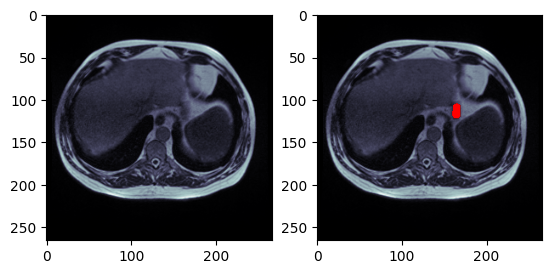

In [119]:
show_img(seg_img, true_img, 0)